In [1]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


df= pd.read_csv(r'C:/Users/Melanie/Downloads/trainWP.csv' )
test= pd.read_csv(r'C:/Users/Melanie/Downloads/testWP.csv')

# print(df.head())
x_train= df.drop('Potability', axis=1)
y_train=df['Potability']

x_test= test.drop('Potability', axis=1)
y_test= test['Potability']

# x_train=x_train.drop('Sulfate', axis=1)
# x_test=x_test.drop('Sulfate', axis=1)

#Scaling data to increase accuracy
scaler=StandardScaler()
x_train_s= scaler.fit_transform(x_train)
x_test_s= scaler.fit_transform(x_test)

x_train.describe()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000,2620.000000
mean,1634.887786,7.071476,196.380374,21910.679472,7.122562,333.679922,425.878941,14.278413,66.659183,3.965589
std,939.638983,1.470119,32.711562,8768.154565,1.575487,36.431948,81.290482,3.327985,15.757081,0.784415
min,0.000000,0.975578,47.432000,320.942611,0.352000,180.206746,181.483754,2.200000,8.175876,1.450000
25%,819.750000,6.277417,177.174300,15457.179017,6.135761,315.824962,365.712099,12.022616,57.246340,3.439362
50%,1626.500000,7.077760,197.315653,20663.910600,7.105432,333.947369,421.644860,14.167458,66.762059,3.959577
75%,2441.250000,7.833973,216.675562,27323.917427,8.100254,350.874553,482.596350,16.570591,77.125356,4.500320
max,3275.000000,14.000000,323.124000,61227.196010,13.127000,475.737460,708.226365,28.300000,124.000000,6.739000


<AxesSubplot:>

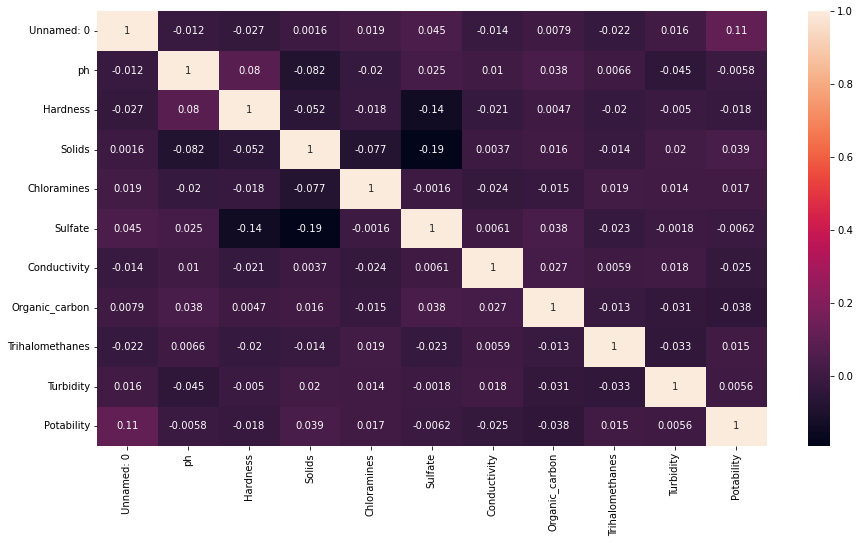

In [2]:
# Correlation between data
correlation= df.corr()
plt.figure(figsize= (15,8))
sns.heatmap(correlation, annot=True)



In [13]:
# Find best number of layers
model=MLPClassifier()
grid= {'hidden_layer_sizes':(1, 300)}
search= GridSearchCV(model, grid)
search.fit(x_test, y_test)
search.best_params_

{'hidden_layer_sizes': 1}

0.6371951219512195
[[415   3]
 [235   3]]


<AxesSubplot:>

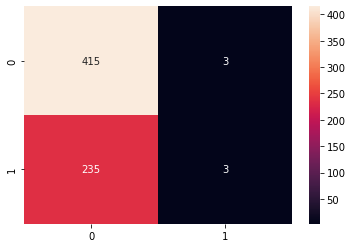

In [14]:
model= MLPClassifier(hidden_layer_sizes=(30), max_iter=300, activation='tanh',solver='adam',random_state=1)
model.fit(x_train, y_train)
y_predict=model.predict(x_test)
score= metrics.accuracy_score(y_test, y_predict)
print (score)

cf_matrix= confusion_matrix(y_test, y_predict)
print (cf_matrix)
sns.heatmap(cf_matrix,fmt='d', annot=True)

In [12]:
scores=[]
for i in range(100):
    model= MLPClassifier(hidden_layer_sizes=(i+1), max_iter=300, activation='tanh',solver='adam',random_state=1)
    model.fit(x_train_s, y_train)
    y_predict=model.predict(x_test_s)
    score= metrics.accuracy_score(y_test, y_predict)
    scores.append(score)
    print ("{} has score: {}".format(i+1,score))

    cf_matrix= confusion_matrix(y_test, y_predict)
    print (cf_matrix)
    
max_scores_index= scores.index(max(scores))
print("Max Accuracy: {} is at {}".format(max(scores), max_scores_index+1))

1 has score: 0.6371951219512195
[[418   0]
 [238   0]]
2 has score: 0.6707317073170732
[[401  17]
 [199  39]]
3 has score: 0.6844512195121951
[[372  46]
 [161  77]]
4 has score: 0.6524390243902439
[[367  51]
 [177  61]]
5 has score: 0.649390243902439
[[351  67]
 [163  75]]
6 has score: 0.6951219512195121
[[359  59]
 [141  97]]
7 has score: 0.6722560975609756
[[355  63]
 [152  86]]
8 has score: 0.7286585365853658
[[373  45]
 [133 105]]
9 has score: 0.6905487804878049
[[342  76]
 [127 111]]
10 has score: 0.7057926829268293
[[354  64]
 [129 109]]
11 has score: 0.7027439024390244
[[348  70]
 [125 113]]
12 has score: 0.6920731707317073
[[345  73]
 [129 109]]
13 has score: 0.6920731707317073
[[342  76]
 [126 112]]
14 has score: 0.7179878048780488
[[349  69]
 [116 122]]
15 has score: 0.6783536585365854
[[337  81]
 [130 108]]
16 has score: 0.6951219512195121
[[340  78]
 [122 116]]
17 has score: 0.698170731707317
[[336  82]
 [116 122]]
18 has score: 0.7225609756097561
[[350  68]
 [114 124]]
19 

0.7454268292682927
[[353  65]
 [102 136]]


<AxesSubplot:>

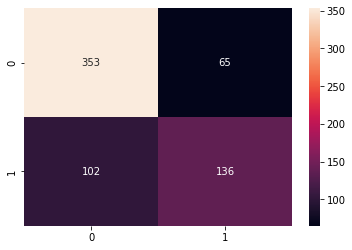

In [11]:
# Create model and confusion matrix using best number of layers 
model= MLPClassifier(hidden_layer_sizes=(72), max_iter=300, activation='tanh',solver='adam',random_state=1)
model.fit(x_train_s, y_train)
y_predict=model.predict(x_test_s)
score= metrics.accuracy_score(y_test, y_predict)
print (score)

cf_matrix= confusion_matrix(y_test, y_predict)
print (cf_matrix)
sns.heatmap(cf_matrix,fmt='d', annot=True)